#### Importing Necessary Libraries

In [1]:
import numpy as np
import pydicom
import matplotlib.pyplot as plt
%matplotlib inline

#### Getting the Data In

In [2]:
data_file_of_last_slice_of_CT_scan = pydicom.dcmread('data/P1152/P1152_pCT_20140226_136.dcm') 
pixel_array = data_file_of_last_slice_of_CT_scan.pixel_array #pixel array of ct scan

May want to also try `read_file` function of pydicom (instead of `dcmread` later to see if that makes finding contours easier.

#### Exploring the Data Type and Shape

This is a **numpy array** of values that indicates the brightness of each pixel. This means all numpy array functions and numpy-compatible libraries (such as sk-image) can be used to analyze.

In [3]:
type(pixel_array)

numpy.ndarray

In [4]:
pixel_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [5]:
pixel_array.shape

(512, 512)

#### Exploring the Values of Pixels in the Array

In [6]:
print('The average value of a pixel in the array is {0:.0f}'.format(pixel_array.mean()))
print('The standard deviation of pixel values in the array is {0:.0f}'.format(pixel_array.std()))
print('The minimum value of a pixel in the array {}'.format(pixel_array.min()))
print('The maximum value of a pixel in the array {}'.format(pixel_array.max()))

The average value of a pixel in the array is 171
The standard deviation of pixel values in the array is 343
The minimum value of a pixel in the array 0
The maximum value of a pixel in the array 2607


#### Displaying the Image

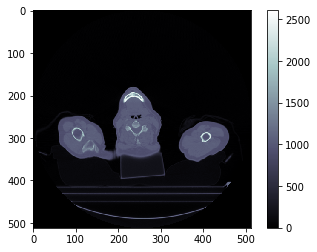

In [7]:
plt.imshow(pixel_array, cmap=plt.cm.bone)  # i like the cm.heat
plt.colorbar()

#### Opening Up Contour Data

In [8]:
contour_file_for_all_onehundredthirtysix_scans = pydicom.dcmread('data/P1152/P1152_RTStructure_1.dcm')

#### Let's Explore and Find the Contours

The contours we need are contained in a feature called `ROIContourSequence`. It is of type Sequence.

In [9]:
print('The type of ROIContourSequence    : {}'.format(str(type(contour_file_for_all_onehundredthirtysix_scans.ROIContourSequence))))
print('The type of ROIContourSequence[1] : {}'.format(str(type(contour_file_for_all_onehundredthirtysix_scans.ROIContourSequence[1]))))

The type of ROIContourSequence    : <class 'pydicom.sequence.Sequence'>
The type of ROIContourSequence[1] : <class 'pydicom.dataset.Dataset'>


This the first 'set' of contours corresponding to only one point: 'iso LUL'. It seems that the contours sit within 'DS'. How to get at them?

In [10]:
contour_file_for_all_onehundredthirtysix_scans.ROIContourSequence[0]

(3006, 002a) ROI Display Color                   IS: ['255', '0', '0']
(3006, 0040)  Contour Sequence   1 item(s) ---- 
   (3006, 0042) Contour Geometric Type              CS: 'POINT'
   (3006, 0046) Number of Contour Points            IS: '1'
   (3006, 0050) Contour Data                        DS: ['-6.3832092285156', '14.326019287109', '-688.07800292969']
   ---------
(3006, 0084) Referenced ROI Number               IS: '1'

It seems that this is a sequence of contours, and I can access individual units of these by calling `ContourSequence[i]`

In [12]:
contour_file_for_all_onehundredthirtysix_scans.ROIContourSequence[1].ContourSequence[0]

(3006, 0016)  Contour Image Sequence   1 item(s) ---- 
   (0008, 1150) Referenced SOP Class UID            UI: CT Image Storage
   (0008, 1155) Referenced SOP Instance UID         UI: 2.16.840.1.114362.1.6.7.5.17616.11849865775.479250700.411.1419
   ---------
(3006, 0042) Contour Geometric Type              CS: 'CLOSED_PLANAR'
(3006, 0046) Number of Contour Points            IS: '68'
(3006, 0050) Contour Data                        DS: ['-85.429992675781', '66.031005859375', '-655.5', '-85.31201171875', '65.914001464844', '-655.5', '-83.43798828125', '65.914001464844', '-655.5', '-83.320007324219', '66.031005859375', '-655.5', '-83.203002929688', '66.148010253906', '-655.5', '-82.968994140625', '66.148010253906', '-655.5', '-82.852005004883', '66.265991210938', '-655.5', '-82.733993530273', '66.383026123047', '-655.5', '-82.617004394531', '66.500030517578', '-655.5', '-82.5', '66.617034912109', '-655.5', '-82.382995605469', '66.734008789062', '-655.5', '-82.266006469727', '66.852020263

Note the z-values are always the same here.
Each one of these sets of contours has the same z-coordinate suggesting these units correspond to different slices. Here is another slice:

In [13]:
contour_file_for_all_onehundredthirtysix_scans.ROIContourSequence[1].ContourSequence[1]

(3006, 0016)  Contour Image Sequence   1 item(s) ---- 
   (0008, 1150) Referenced SOP Class UID            UI: CT Image Storage
   (0008, 1155) Referenced SOP Instance UID         UI: 2.16.840.1.114362.1.6.7.5.17616.11849865775.479250700.411.1418
   ---------
(3006, 0042) Contour Geometric Type              CS: 'CLOSED_PLANAR'
(3006, 0046) Number of Contour Points            IS: '251'
(3006, 0050) Contour Data                        DS: ['-80.038986206055', '57.125030517578', '-658.5', '-79.921997070312', '57.008026123047', '-658.5', '-79.453002929688', '57.008026123047', '-658.5', '-79.335998535156', '57.125030517578', '-658.5', '-79.218994140625', '57.242034912109', '-658.5', '-78.983993530273', '57.242034912109', '-658.5', '-78.867004394531', '57.359008789062', '-658.5', '-78.75', '57.477020263672', '-658.5', '-78.632995605469', '57.593994140625', '-658.5', '-78.516006469727', '57.710998535156', '-658.5', '-78.397994995117', '57.828002929688', '-658.5', '-78.281005859375', '57.94497

In [14]:
contour_file_for_all_onehundredthirtysix_scans.ROIContourSequence[1].ContourSequence[27]

(3006, 0016)  Contour Image Sequence   1 item(s) ---- 
   (0008, 1150) Referenced SOP Class UID            UI: CT Image Storage
   (0008, 1155) Referenced SOP Instance UID         UI: 2.16.840.1.114362.1.6.7.5.17616.11849865775.479250700.349.1395
   ---------
(3006, 0042) Contour Geometric Type              CS: 'CLOSED_PLANAR'
(3006, 0046) Number of Contour Points            IS: '180'
(3006, 0050) Contour Data                        DS: ['-113.55499267578', '35.56201171875', '-727.5', '-113.43798828125', '35.445007324219', '-727.5', '-111.56201171875', '35.445007324219', '-727.5', '-111.44500732422', '35.56201171875', '-727.5', '-111.32800292969', '35.680023193359', '-727.5', '-111.09399414062', '35.680023193359', '-727.5', '-110.97700500488', '35.797027587891', '-727.5', '-110.85899353027', '35.914001464844', '-727.5', '-110.74200439453', '36.031005859375', '-727.5', '-110.625', '36.148010253906', '-727.5', '-110.50799560547', '36.266021728516', '-727.5', '-110.39100646973', '36.38299

In [15]:
contour_file_for_all_onehundredthirtysix_scans.ROIContourSequence[1].ContourSequence[26]

(3006, 0016)  Contour Image Sequence   1 item(s) ---- 
   (0008, 1150) Referenced SOP Class UID            UI: CT Image Storage
   (0008, 1155) Referenced SOP Instance UID         UI: 2.16.840.1.114362.1.6.7.5.17616.11849865775.479250700.349.1395
   ---------
(3006, 0042) Contour Geometric Type              CS: 'CLOSED_PLANAR'
(3006, 0046) Number of Contour Points            IS: '421'
(3006, 0050) Contour Data                        DS: ['-65.977005004883', '9.0780029296875', '-727.5', '-65.858993530273', '8.9609985351562', '-727.5', '-65.391006469727', '8.9609985351562', '-727.5', '-65.272994995117', '9.0780029296875', '-727.5', '-65.272994995117', '9.31201171875', '-727.5', '-65.156005859375', '9.4299926757812', '-727.5', '-65.039001464844', '9.5469970703125', '-727.5', '-65.039001464844', '11.422027587891', '-727.5', '-64.921997070312', '11.539001464844', '-727.5', '-64.804992675781', '11.656005859375', '-727.5', '-64.68798828125', '11.773010253906', '-727.5', '-64.570007324219', '1

In [16]:
# Looking at all the functions that are callable on ContourSequence
dir(contour_file_for_all_onehundredthirtysix_scans.ROIContourSequence[1].ContourSequence[26])

['ContourData',
 'ContourGeometricType',
 'ContourImageSequence',
 'NumberOfContourPoints',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__init__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_character_set',
 '_convert_YBR_to_RGB',
 '_get_pixel_array',
 '_is_uncompressed_transfer_syntax',
 '_pretty_str',
 '_reshape_pixel_array',
 '_slice_dataset',
 'add',
 'add_new',
 'clear',
 'convert_pixel_data',
 'copy',
 'data_element',
 'decode',
 'decompress',
 'dir',
 'formatted_lines',
 'fromkeys',
 'get',
 'get_item',
 'group_dataset',
 'items',
 'iterall',
 'keys',
 'pixel_array',
 'pop',
 'popitem',
 'remove_private_tags',
 'save_as',
 'setdefault',
 'top',
 'trait_names',
 'upda

#### ContourData Itself

In [17]:
type(contour_file_for_all_onehundredthirtysix_scans.ROIContourSequence[1].ContourSequence[26].ContourData)

pydicom.multival.MultiValue

In [18]:
# keeps going
contour_file_for_all_onehundredthirtysix_scans.ROIContourSequence[1].ContourSequence[26].ContourData[:3]

["-65.977005004883", "9.0780029296875", "-727.5"]

In [19]:
contour_file_for_all_onehundredthirtysix_scans.ROIContourSequence[1].ContourSequence[26].ContourData[2]

"-727.5"

This is a way of accessing the contour data. They are not organized the best way, with no recognition of the fact that these are 3D coordinates. Need to be converted to floats and probably to coordinates. 

In [20]:
# ContourData is like a list of coordinates
print("How many Contour Points do we have? {}".format(
      contour_file_for_all_onehundredthirtysix_scans.
      ROIContourSequence[1].ContourSequence[26].NumberOfContourPoints))
print("How many coordinates are expected for {} contour points? {}".format(
      contour_file_for_all_onehundredthirtysix_scans.
      ROIContourSequence[1].ContourSequence[26].NumberOfContourPoints,
      3*int(contour_file_for_all_onehundredthirtysix_scans.
            ROIContourSequence[1].ContourSequence[26].NumberOfContourPoints)))
print("How many coordinates do we have in ContourData? {}".format(
        len(contour_file_for_all_onehundredthirtysix_scans.
            ROIContourSequence[1].ContourSequence[26].ContourData)))

How many Contour Points do we have? 421
How many coordinates are expected for 421 contour points? 1263
How many coordinates do we have in ContourData? 1263


In [28]:
len(contour_file_for_all_onehundredthirtysix_scans.ROIContourSequence[1].ContourSequence[27].ContourData)

540

In [22]:
contour_file_for_all_onehundredthirtysix_scans.ROIContourSequence[1].ContourSequence[26].ContourImageSequence[0]

(0008, 1150) Referenced SOP Class UID            UI: CT Image Storage
(0008, 1155) Referenced SOP Instance UID         UI: 2.16.840.1.114362.1.6.7.5.17616.11849865775.479250700.349.1395

In [23]:
contour_file_for_all_onehundredthirtysix_scans.ROIContourSequence[1].ContourSequence[4].ContourData

['-80.742004394531', '51.968994140625', '-661.5', '-80.625', '51.852020263672', '-661.5', '-76.641006469727', '51.852020263672', '-661.5', '-76.522994995117', '51.968994140625', '-661.5', '-76.406005859375', '52.085998535156', '-661.5', '-76.171997070312', '52.085998535156', '-661.5', '-76.054992675781', '52.203002929688', '-661.5', '-75.93798828125', '52.319976806641', '-661.5', '-75.820007324219', '52.438018798828', '-661.5', '-75.820007324219', '52.672027587891', '-661.5', '-75.703002929688', '52.789001464844', '-661.5', '-75.585998535156', '52.906005859375', '-661.5', '-75.585998535156', '55.953002929688', '-661.5', '-75.468994140625', '56.069976806641', '-661.5', '-75.352005004883', '56.188018798828', '-661.5', '-75.233993530273', '56.305023193359', '-661.5', '-75.117004394531', '56.422027587891', '-661.5', '-75', '56.539001464844', '-661.5', '-74.882995605469', '56.656005859375', '-661.5', '-74.766006469727', '56.773010253906', '-661.5', '-74.647994995117', '56.890991210938', '-6

In [24]:
contour_file_for_all_onehundredthirtysix_scans.ROIContourSequence[1].ContourSequence[31].ContourImageSequence[0]

(0008, 1150) Referenced SOP Class UID            UI: CT Image Storage
(0008, 1155) Referenced SOP Instance UID         UI: 2.16.840.1.114362.1.6.7.5.17616.11849865775.479250700.333.1391

In [25]:
sample_dicom_image_file = pydicom.dcmread('data/P1152/P1152_pCT_20140226_043.dcm') 

In [26]:
sample_dicom_image_file.SOPInstanceUID

'2.16.840.1.114362.1.6.7.5.17616.11849865775.479250700.271.1368'

? Does this metadata also exist in the images themselves which would lend to mapping of contours to slices?

How to map the contours to the images?

data_file_of_last_slice_of_CT_scan.SOPInstanceUID

Note that `ContourSequence[26]` and `27` both have the same slice height, and the `ContourImageSequence[0]` gives the same value for both of them.

How to match the slices to the images
Is it true that the ContourSequences refer to the same z-height sometimes because they are multiple structures.
Check the images and get the contours.
also if there so multiple structures on an image, there should be way more than 29 images right?


#### Outstanding Questions

* Why are there 32 of these Sequences?
    * One would have thought that there are 32 slices for the first ContourSequence but that is not the case.

* Check if the metadata `ContourImageSequence[0]` matches metadata of images themselves. That would enable mapping.

* How to look at dicompyler source code to see how it solves this problem of matching contours to images.